# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print "\nMean:"
print data.mean()
print "\nStandard deviation:"
print data.std()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Mean:
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Standard deviation:
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64


In [2]:
# normalize each feature
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
data_scaled = scaler.fit_transform(data - data.mean())

print data_scaled[:10, :]

print "\nMean:"
for col in data_scaled.T:
    print col.mean()
print "\nStandard deviation:"
for col in data_scaled.T:
    print col.std()

[[ 0.00667696  0.05701086 -0.00460077 -0.0494477  -0.00546819 -0.00402581]
 [-0.04935859  0.05928554  0.01905867 -0.02266433  0.01084468  0.00541016]
 [-0.056388    0.04448533 -0.00315079 -0.0115392   0.01672153  0.13613495]
 [ 0.01262799 -0.06794901 -0.04397422  0.05765116 -0.0625764   0.00566868]
 [ 0.1059873  -0.00570541 -0.00887998  0.01458669 -0.02910735  0.07885129]
 [-0.02583404  0.03637623 -0.03330567 -0.04162723 -0.02863299 -0.00159141]
 [ 0.00125513 -0.03836336 -0.01150881 -0.04484539  0.00681258 -0.02110965]
 [-0.04414645 -0.01241129  0.01738471 -0.02427341  0.01158258  0.02242937]
 [-0.06028213 -0.03173133 -0.02073917 -0.04579699 -0.03071492 -0.01669327]
 [-0.05985278  0.07823631  0.1288446  -0.03309739  0.11973768  0.01234711]]

Mean:
-2.52323414688e-18
0.0
-8.07434927e-18
3.28020439094e-18
6.0557619525e-18
5.04646829375e-19

Standard deviation:
0.126139392322
0.108889169689
0.111900277787
0.0838996453082
0.125507174601
0.0606853286897


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

I only have a few, very broad guesses about what the variance will look like, especially since we have scaled each category with its maximum expenditure.

For the first PCA component, I think we will see "fresh" and "milk" have the same sign. Customers interested in one perishable item are likely interested in others, so we would expect them to vary together and as part of the first component.

In the first component, I believe that all the other dimensions would also have the sign, as more spending in one category would likely be associated with higher spending in others.

Further, I would expect the *delicatessen* and *frozen* magnitudes to be small in the first PCA component, simply because there is less variation in those dimensions overall.

For ICA components, making guesses is even more difficult. The most simple case would that categories are mostly independent of each other in customer purchasing. For a given component, there would be one category with a large magnitude, and the rest would have a relatively small magnitude with the opposite sign. (The small negative magnitude of the other components is because the un-scaled data is uniformly positive but has been mean-normalized for ICA).

I would consider this--that ICA components more-or-less line up with the categories--to be the default outcome. Any deviation from that is interesting.

### PCA

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
n_features = data_scaled.shape[1]
n_samples = data_scaled.shape[0]
n_components = n_features

from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA components:"
print pca.components_
print "\nexplained variance:"
print pca.explained_variance_ratio_
print "\ncumulative explained variance:"
print np.cumsum(pca.explained_variance_ratio_)

PCA components:
[[ -2.01256748e-02   4.90848222e-01   5.82012008e-01  -1.72017139e-02
    6.43116310e-01   7.76563979e-02]
 [ -8.91062148e-01  -1.71130905e-01   4.56375604e-04  -3.56368970e-01
    1.15793870e-01  -1.90565448e-01]
 [  4.51377269e-01  -3.69724766e-01   9.44625098e-02  -6.69049162e-01
    2.39047016e-01  -3.81927658e-01]
 [ -2.97656925e-02  -6.40258287e-01   2.06433605e-01   6.14293858e-01
    3.44491604e-01  -2.24804554e-01]
 [  9.70182335e-03   4.26414968e-01  -2.13791280e-01   2.18266341e-01
   -2.30762701e-02  -8.50997490e-01]
 [ -2.96924947e-02  -3.64065401e-02   7.51010722e-01  -9.01871261e-03
   -6.29795789e-01  -1.92488291e-01]]

explained variance:
[ 0.51762627  0.27336241  0.10304974  0.06064994  0.03250552  0.01280611]

cumulative explained variance:
[ 0.51762627  0.79098868  0.89403842  0.95468837  0.98719389  1.        ]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

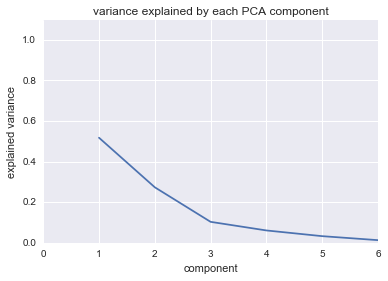

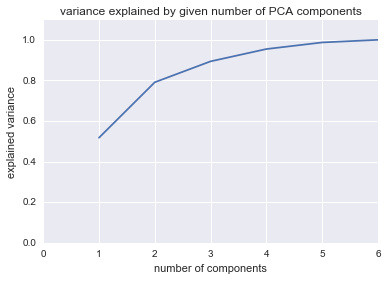

In [4]:
plt.figure()
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_)
plt.axis([0, n_components, 0, 1.1])
plt.xlabel("component")
plt.ylabel("explained variance")
plt.grid(True)
plt.title("variance explained by each PCA component")

plt.figure()
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, n_components, 0, 1.1])
plt.xlabel("number of components")
plt.ylabel("explained variance")
plt.grid(True)
plt.title("variance explained by given number of PCA components")

Answer:

The explained variance falls off rather quickly after the first two components which, between them, capture 79.1% of the variance in the normalized data.

If I were to use PCA on this dataset, how many components I would use would vary depending on what I was trying to do. There are so few dimensions that I don't believe that I would throw any of them away, and use the full set. Unless I start running into computational issues, I don't see any reason to reduce the dimension.

That said, if I *did* start running into computational issues, and I need my algorithms to run more efficiently, then I would absolutely keep the first two dimensions. I would compare the results from using two dimensions to those from using three and four dimensions, though, to see what the right balance is. If my clusters change significantly between using 2 dimensions and 3 dimensions, then perhaps there is some important information in that third dimension, even though it represents much less of the total variation. Honestly, I doubt that fourth dimension will make a difference, but I don't see a reason not to check.

Unless we want to create tens or hundreds of market segments (which we do not even have the data to do), the last 2.3% of variance that the fifth and sixth dimensions capture should not matter.

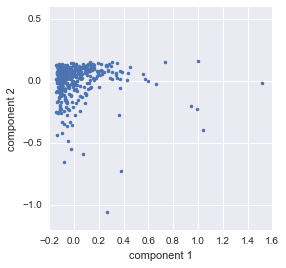

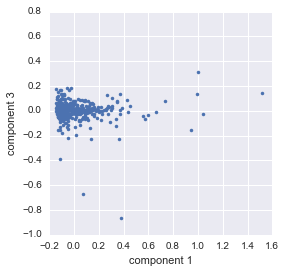

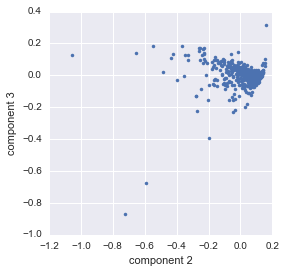

In [5]:
# X_reduced = np.dot(pca.components_, np.transpose(data.as_matrix()))

plt.figure()
plt.plot(data_pca[:, 0], data_pca[:, 1], '.')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt_axis1 = plt.axis('square')

plt.figure()
plt.plot(data_pca[:, 0], data_pca[:, 2], '.')
plt.xlabel("component 1")
plt.ylabel("component 3")
plt_axis2 = plt.axis('square')

plt.figure()
plt.plot(data_pca[:, 1], data_pca[:, 2], '.')
plt.xlabel("component 2")
plt.ylabel("component 3")
plt_axis3 = plt.axis('square')

In [6]:
print 'Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen'
# Print the independent components
print pca.components_

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
[[ -2.01256748e-02   4.90848222e-01   5.82012008e-01  -1.72017139e-02
    6.43116310e-01   7.76563979e-02]
 [ -8.91062148e-01  -1.71130905e-01   4.56375604e-04  -3.56368970e-01
    1.15793870e-01  -1.90565448e-01]
 [  4.51377269e-01  -3.69724766e-01   9.44625098e-02  -6.69049162e-01
    2.39047016e-01  -3.81927658e-01]
 [ -2.97656925e-02  -6.40258287e-01   2.06433605e-01   6.14293858e-01
    3.44491604e-01  -2.24804554e-01]
 [  9.70182335e-03   4.26414968e-01  -2.13791280e-01   2.18266341e-01
   -2.30762701e-02  -8.50997490e-01]
 [ -2.96924947e-02  -3.64065401e-02   7.51010722e-01  -9.01871261e-03
   -6.29795789e-01  -1.92488291e-01]]


**3)** What do the dimensions seem to represent? How can you use this information?

Answer:

The dimensions represent the directions in which the data varies. The first two components explain similar amounts of variance. The first points mostly in the "milk-grocery-detergents_paper" direction, and the second points more-or-less in the "fresh" direction.

Just by looking at these first two PCA components, we see that the customers tend to buy "grocery", "frozen", and "detergents_paper" together, and the "fresh" varies only loosely with any other categories.

The data of most customers will lie near the plane defined by these first two vectors. As discussed above, we can project our data onto the first few PCA components in order to reduce the dimensionality of our data.

Even if we do not use the components for dimension reduction for our computation and analysis, projecting onto the PCA components will allow us to visualize our data effectively without losing significant meaning.

### ICA

In [7]:
for col in data_scaled.transpose():
    print col.mean()

-2.52323414688e-18
0.0
-8.07434927e-18
3.28020439094e-18
6.0557619525e-18
5.04646829375e-19


In [8]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin fi|rst!
from sklearn.decomposition import FastICA

ica = FastICA(n_components=n_components, whiten=True, random_state=42)

ica.fit(data_scaled)
# data_ica = ica.fit_transform(data_scaled)

print 'Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen'
# Print the independent components

A = np.zeros(ica.components_.shape)
for i in range(ica.components_.shape[1]):
    component = ica.components_[i]
    component /= np.linalg.norm(component)
    A[i] = component

print A

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
[[-0.12069627 -0.01378871  0.0925356   0.90437177 -0.02884341 -0.39744081]
 [-0.03173331  0.18851928 -0.96019094 -0.02875319  0.15126655  0.1333361 ]
 [-0.94572922  0.14112658  0.14881367  0.09230931 -0.20810688  0.10818749]
 [ 0.01863745 -0.11539362 -0.6611499   0.05792844  0.71686982  0.17877282]
 [-0.04696914 -0.01690646 -0.05980194 -0.02938046  0.02300923  0.9962626 ]
 [ 0.01780038  0.74597989 -0.56571791 -0.02213078  0.15571617 -0.31372456]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

We can imagine the ICA components to be the underlying purchasing behaviors that combine in different ways for each customer to create their purchases. We can take these as idealized customers or, more realistically, as the principle behaviors that sum to create each customer's buying history.

For most of the components that we identify, we can make up explanations for what they mean. To relate the components to customer characteristics and motivations, however, we should talk to customers that strongly exhibit a given component to learn what their underlying reasons for their purchasing pattern is.

* One component describes a tendency for *frozen* to be purchased in inverse to *delicatessen*.

* Another component describes a tendency to buy *grocery*, with a small tendency to buy less *milk*, *detergents_paper* or *delicatessen*.

* A third component describes a tendency to buy *fresh* and a bit of *detergents_paper* at the expense of the other categories.

* A fourth component describes the tendency of *grocery* and *detergents_paper* to move opposite each other.

* A fifth component is simply a lot of *delicastessen* buying, without any other categories varying significantly from the mean. Perhaps this indicates that a customer has a meat counter or sells sandwiches.

* A sixth component describes a tendency for *grocery* and *delicatessen* to be purchased together, but not with *milk* (and/or vice versa).

Technical note: To make discussion easier, we have fixed the random seed to get identical results with every test run. Even with a different random seed, though, these components are reliably reproduced with only small variations.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K-Means clustering is relatively fast and robust. Perhaps its greatest advantage, however, is its simplicity and ease of use.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [9]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [10]:
data_log = data.apply(np.log)
print data_log.head()

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525


In [11]:
def plot_cdf(df, column, new_fig=True):
    if new_fig == True: 
        plt.figure()
    
    ser = df[column].sort_values()
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    plt.plot(ser, ser_cdf, drawstyle='steps')

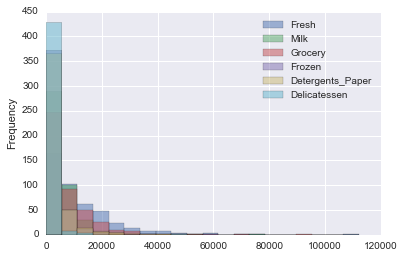

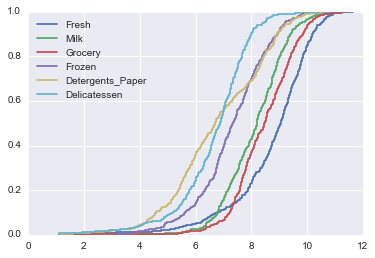

In [12]:
data.plot(kind='hist', alpha=0.5, bins=20)

plt.figure()
for col in data_log.columns:
    plot_cdf(data_log, col, new_fig=False)
    
plt.legend(data_log.columns, loc='best')

In [13]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_log)
# print reduced_data.shape
# print reduced_data[:10]  # print up to 10 elements

In [29]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = GMM(n_components=12)
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=12, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [30]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
hx = (x_max-x_min)/1000.0
hy = (y_max-y_min)/1000.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

### PCA components

In [31]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

# centroids = clusters.cluster_centers_
# print centroids

In [32]:
# np.dot(centroids, pca.components_[:2])

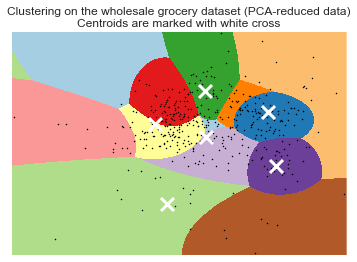

In [33]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

The centroids (denoted by the white "x"s in the plot above), describe the "average" customer in each segment. In this case, they are less "clusters" and more "brackets". That is to say, if we look at the scatter plot of the data, it looks like the customers do not bunch up naturally--all the clustering really does is split them up into brackets on the two dimensions. It may be useful to break the customers up into brackets for analysis or marketing, but it does not look like there is anything in the data suggesting that there is a "natural" clustering.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

For this analysis, I was particularly intrigued by the independent component analysis. If it can truly be interpreted as a set of independent, underlying behaviors that make up the overall purchasing of each customer, then the results are complex and intriguing. If we can determine the qualities of the customers that lead to each component, then we should be able to better design advertising, promotions, pricing, or even store layout in a way that better captures profitable behaviors and/or improves customer satisfaction. 

The principal component analysis was useful for reducing the number of features in our data, and it revealed a clear plane of maximal variation. There are perhaps some business insights that can be teased out of that--e.g. why do "milk", "grocery" and "detergents_paper" vary together? And why does "fresh" tend to vary less with categories?

The clustering we have tried so far seems simply like a convenient way of describing our data. It does not reveal any clear patterns in the data.

**9)** How would you use that technique to help the company design new experiments?

Answer:

The challenge with our results from ICA is that we do not know exactly how they are meaningful descriptions of the customers. What we should do is find the customers that most strongly exhibit certain behaviors and look at what they buy and why. As an analogy to the cocktail problem, this would be like moving your microphone as close as possible to one of the sources in order to figure out what that particular source sounds like.

We can identify those customers readily enough (see below). Now we have to gather the data that it will take to extract a bit more meaning.

A simple experiment that the store can do is start to tweak promotions to see whether you can manipulate these findings. For example, if you offer a good deal or a sale on *grocery* and get an increase in volume, do you see a corresponding increase in *detergents_paper*?

Given that all the customers are a mix of these maximally independent components, it would be useful to figure out what, if anything, causes these components. To work towards answering that, I would try to look at the data on individual transactions. A simple hypothesis is that each component represents a certain kind of purchasing experience--e.g. restocking the freezers, or restocking the dry goods. If this is true, then we may expect individual transactions to resemble the ICA components more closely than customers' aggregate behavior.

If individual shopping experiences do resemble the ICA components, then more interesting experiments may involve the layout of the store. Perhaps you can increase the sale of a specific *detergents_paper* product by moving it closer to the *fresh* section. Or maybe you could streamline a customer's buying by putting *grocery* and *delicatessen* close to each other, or separate them in order to get a customer to walk past many other products.

In [ ]:
from sklearn.preprocessing import normalize

data_ica = np.dot(data_scaled, A.transpose())
print "the first 5 customers transformed into ICA space:"
print normalize(data_ica[:5, :])

ica_argmax = np.argmax(np.abs(data_ica), axis=0)
print "\ncustomers that are closest to a given ICA component:"
print ica_argmax

for arg in ica_argmax:
    print data_ica[arg]

**10)** How would you use that data to help you predict future customer needs?

Answer: 

Most directly, the ICA components could inform premium or targeted services that address customer needs. For example, only one ICA component has a large *frozen* component. If a customer has a significant score along that component, then they may be interested in related deals or announcements, regardless of the total volume of *frozen* sales they actually have. And, if the wholesaler is interested in changing inventory, then those customers are likely the ones to care the most, and could be targeted for research.

More indirectly, ICA components could be used as preprocessing for other analysis. If we plan to do regression or classification, the transformed data may yield more accurate predictions than the non-transformed data.